In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
y_pred_train = np.full(y_train.shape, y_train.mean())
y_pred_test = np.full(y_test.shape, y_train.mean())

In [6]:
n_estimators = 100
learning_rate = 0.1
weak_learners = []
for i in range(n_estimators):
    residuals = y_train - y_pred_train
    tree = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree.fit(X_train_scaled, residuals)
    weak_learners.append(tree)
    update_train = learning_rate * tree.predict(X_train_scaled)
    update_test = learning_rate * tree.predict(X_test_scaled)
    y_pred_train += update_train
    y_pred_test += update_test
    if (i + 1) % 10 == 0:
        print(f"Training progress: {i + 1} / {n_estimators}")
y_pred_binary = (y_pred_test >= 0.5).astype(int)


Training progress: 10 / 100
Training progress: 20 / 100
Training progress: 30 / 100
Training progress: 40 / 100
Training progress: 50 / 100
Training progress: 60 / 100
Training progress: 70 / 100
Training progress: 80 / 100
Training progress: 90 / 100
Training progress: 100 / 100


In [8]:
print("\nEvaluation on test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_binary):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_binary):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_binary):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_test):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))




Evaluation on test set:
Accuracy: 0.9386
Precision: 0.9452
Recall: 0.9583
F1 Score: 0.9517
ROC AUC: 0.9921

Confusion Matrix:
[[38  4]
 [ 3 69]]


In [9]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



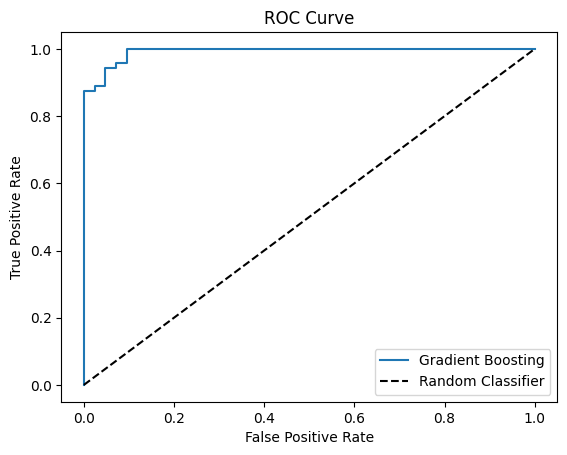

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label="Gradient Boosting")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()